In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
survey_kaggle:pd.DataFrame = pd.read_csv("data/survey-kaggle.csv")
print(survey_kaggle.describe())

             ID  Q1.AI_knowledge  Q2#1.Internet  Q2#2.Books/Papers  \
count  91.00000        91.000000      91.000000          91.000000   
mean   46.00000         5.912088       0.813187           0.351648   
std    26.41338         1.970044       0.391921           0.480130   
min     1.00000         1.000000       0.000000           0.000000   
25%    23.50000         5.000000       1.000000           0.000000   
50%    46.00000         6.000000       1.000000           0.000000   
75%    68.50000         7.000000       1.000000           1.000000   
max    91.00000        10.000000       1.000000           1.000000   

       Q2#3.Social_media  Q2#4.Discussions  Q2#5.NotInformed  \
count          91.000000         91.000000         91.000000   
mean            0.439560          0.197802          0.065934   
std             0.499083          0.400549          0.249542   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.000000       

In [31]:
survey_amiens:pd.DataFrame = pd.read_csv("data/survey-amiens-ue-trans-01.csv")
# print(survey_amiens.describe())
print(survey_amiens.columns)

Index(['Horodateur', 'Quel est votre niveau d'étude ?',
       'Quel est votre niveau en développement (problem solving & software) ?',
       'Pratiquez vous le problem solving (compétition de code) ?',
       'Vous-arrive t-il de l'utiliser du code générer par l'IA sans pour autant le comprendre ?',
       'À quelle fréquence utilisez vous les LLM ?',
       'A quelle fin utilisez-vous les LLM ?',
       'Quels langages de programmation connaissez-vous?',
       'Que va afficher le programme suivant ? ',
       'Quel sera le résultat de ce code ? ',
       'Que retourne cet appel de fonction ? ',
       'Dans quel langage de programmation les exercices de code ont été écrits ?',
       'Comment avez-vous résolu les questions de codes ?',
       'Vous arrive-t-il de verifier ou de remettre en question les réponses fournies par LLM ?'],
      dtype='object')


In [32]:
survey_amiens.columns = [   "timestamp", 
                            "year",
                            "software-level",
                            "probleme-solving",
                            "code-generated-without-understanding",
                            "llm-use-frequency",
                            "llm-use-type",
                            "programming-language",
                            "test-code-1",
                            "test-code-2",
                            "test-code-3",
                            "test-language",
                            "test-code-method",
                            "llm-doubt"]

survey_amiens["evaluation"] = 0
survey_amiens["test-code-2"] = survey_amiens["test-code-2"].str.replace('"', "")
survey_amiens.loc[survey_amiens['test-code-1'] == "2 4", 'evaluation'] += 1
survey_amiens.loc[survey_amiens['test-code-2'] == "[1, 9, 25]", 'evaluation'] += 1
survey_amiens.loc[survey_amiens['test-code-3'] == 7, 'evaluation'] += 1

survey_max = survey_amiens.groupby(["llm-use-frequency", ]).aggregate({"evaluation" : "max"}).reset_index()
survey_mean = survey_amiens.groupby(["llm-use-frequency", ]).aggregate({"evaluation" : "mean"}).reset_index()

survey_metrics = survey_max.join(survey_mean, lsuffix="_max", rsuffix="_mean")
del survey_metrics["llm-use-frequency_mean"]
survey_metrics.columns = ["llm-use-frequency", "evaluation_max", "evaluation_mean"]


custom_order = ["Jamais", "Assez souvent", "Souvent", "Trés souvent"]
survey_metrics["llm-use-frequency"] = pd.Categorical(survey_metrics["llm-use-frequency"], categories=custom_order, ordered=True)
survey_metrics = survey_metrics.sort_values("llm-use-frequency")
survey_metrics

,llm-use-frequency,evaluation_max,evaluation_mean
1,Jamais,2,2.000
0,Assez souvent,3,2.200
2,Souvent,3,2.375
3,Trés souvent,2,1.500


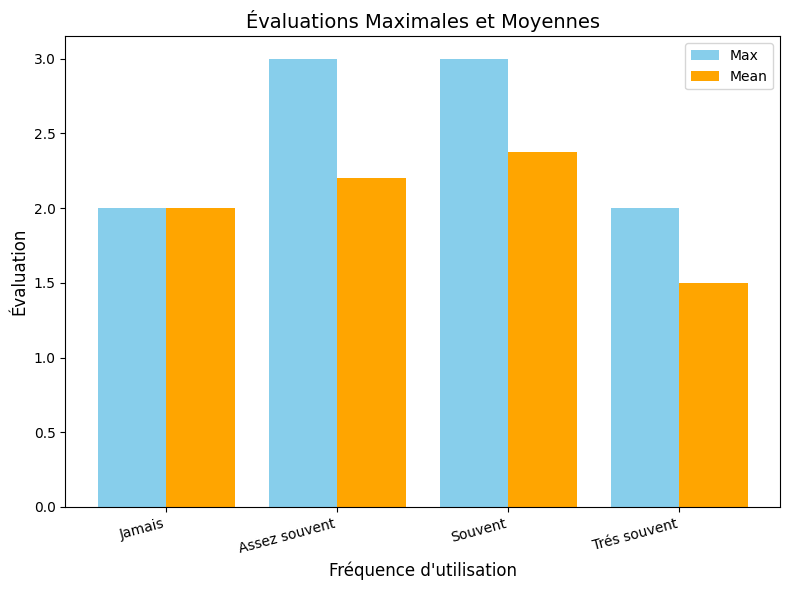

In [33]:
# Création du graphique
x = np.arange(len(survey_metrics["llm-use-frequency"]))  # Les positions des catégories sur l'axe X
width = 0.4  # Largeur des barres

fig, ax = plt.subplots(figsize=(8, 6))

# Ajouter les barres pour `evaluation_max` et `evaluation_mean`
ax.bar(x - width/2, survey_metrics["evaluation_max"], width, label="Max", color="skyblue")
ax.bar(x + width/2, survey_metrics["evaluation_mean"], width, label="Mean", color="orange")

# Ajouter des étiquettes et un titre
ax.set_xlabel("Fréquence d'utilisation", fontsize=12)
ax.set_ylabel("Évaluation", fontsize=12)
ax.set_title("Évaluations Maximales et Moyennes", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(survey_metrics["llm-use-frequency"], rotation=15, ha="right")
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()